# Convert image to LBP

In [2]:
#Import LIB
import cv2
import matplotlib.pyplot as plt
import time
import numpy

## Get Element

In [3]:
def get_element(img, center, x, y):
    value = 1
    try : 
        if img[x][y] < center:
            value = 0
    except :
        pass
    return value

### Define process image

In [4]:
def get_lbp(img ,x, y):
    center = img[x][y]
    value = []
    
    value.append(get_element(img, center, x-1, y-1))
    value.append(get_element(img, center, x-1, y))
    value.append(get_element(img, center, x-1, y+1))
    value.append(get_element(img, center, x, y+1))
    value.append(get_element(img, center, x+1, y+1))
    value.append(get_element(img, center, x+1, y))
    value.append(get_element(img, center, x+1, y-1))
    value.append(get_element(img, center, x, y-1))
    to_change = [1, 2, 4, 8, 16, 32, 64, 128, 256]
    
    last_value = 0
    
    for i in range(len(value)):
        last_value += value[i]*to_change[i]
        
    return last_value

### Define draw histogram

In [5]:
def draw(img):
    plt.hist(img.ravel(), 256, [0,256])
    plt.show()

## Main process

In [6]:
start_time = time.time()

img_color = cv2.imread('LeNa_color.png')
img = plt.imread('LeNa_color.png')

width = img.shape[0]
height= img.shape[1]

img_gray = cv2.imread('LeNa_color.png', 0)
img_white = cv2.numpy.zeros((width, height, 3), dtype = numpy.uint8)

for i in range(width):
    for j in range(height):
        img_white[i][j] = get_lbp(img_gray, i, j)
        
end_time = time.time()
time_use = end_time - start_time

# time of the process
print(img_white)
print("Time to run process : {0}" .format(time_use) + "[sec]")

[[[ 56  56  56]
  [224 224 224]
  [224 224 224]
  ...
  [224 224 224]
  [224 224 224]
  [252 252 252]]

 [[ 62  62  62]
  [227 227 227]
  [227 227 227]
  ...
  [227 227 227]
  [227 227 227]
  [255 255 255]]

 [[ 62  62  62]
  [227 227 227]
  [227 227 227]
  ...
  [227 227 227]
  [227 227 227]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 62  62  62]
  ...
  [112 112 112]
  [249 249 249]
  [124 124 124]]

 [[255 255 255]
  [255 255 255]
  [ 32  32  32]
  ...
  [ 56  56  56]
  [ 56  56  56]
  [ 60  60  60]]

 [[255 255 255]
  [255 255 255]
  [114 114 114]
  ...
  [126 126 126]
  [126 126 126]
  [126 126 126]]]
Time to run process : 1.7206413745880127[sec]


In [7]:
# show the screen
cv2.imshow("Color image", img_color)
cv2.imshow("Gray image", img_gray)
cv2.imshow("After process", img_white)


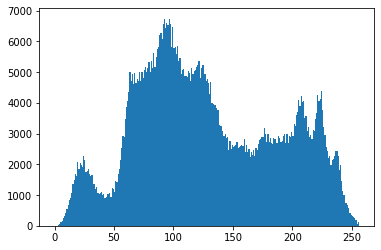

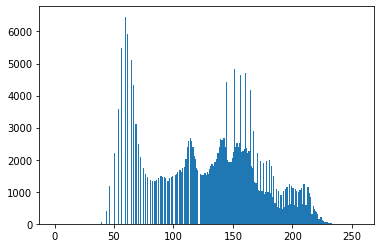

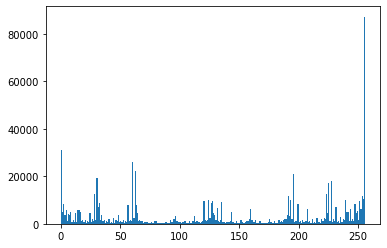

In [8]:
draw(img_color)
draw(img_gray)
draw(img_white)

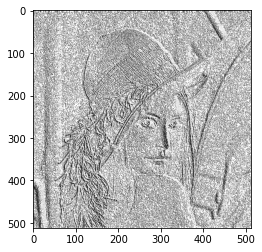

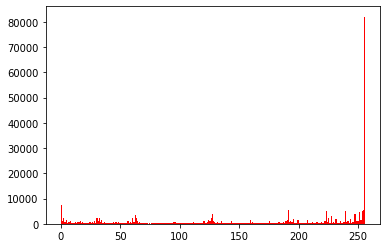

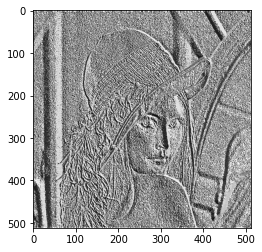

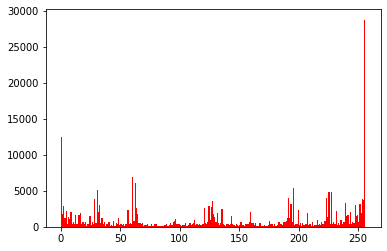

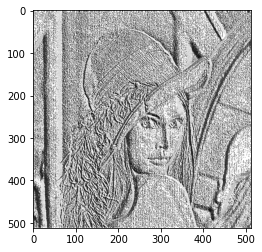

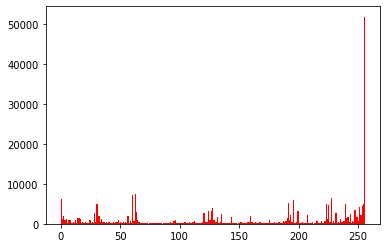

In [9]:

# draw layout img color
for c in range(0, 3):
    split_img = numpy.zeros(img_color.shape, dtype=numpy.uint8)
    split_img[:, :, c] = img_color[:, :, c]
    image_lbp = numpy.zeros((width, height), numpy.uint8)
    image_gray = cv2.cvtColor(split_img, cv2.COLOR_BGR2GRAY)
    for i in range(width):
        for j in range(height):
            image_lbp[i, j] = get_lbp(image_gray, i, j)
    plt.imshow(image_lbp, cmap="gray")
    plt.show()
    plt.hist(image_lbp.ravel(), 256, [0, 256], color='r')
    plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()